In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportion_confint
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.pyplot as plt
sns.set_theme()

In [65]:
df = pd.read_csv("../block_sampling.csv")
df.head()

,dims,n,n_clients,percent_censored,n_samples,strategy,box_width,box_height,prob
0,1,256,10,0.0,1024,Box,1,1,0.086
1,2,256,10,0.0,1024,Box,1,1,0.036
2,1,256,10,0.0,512,Box,1,2,0.094
3,2,256,10,0.0,512,Box,1,2,0.034
4,1,256,10,0.0,256,Box,1,4,0.072


In [66]:
df["prob_95_conf"] = df.apply(lambda r: proportion_confint(count=500*r['prob'], nobs=500, method="wilson")[0]*100, axis=1)

In [67]:
df[(df["n_clients"] == 210) & (df["dims"] == 1) & (df["percent_censored"] == 0.0)] \
    .pivot(index="box_height", columns="box_width", values="prob_95_conf")

box_width,1,2,4,8,16,32,64,128
box_height,,,,,,,,
1,99.237566,99.237566,99.237566,99.237566,99.237566,99.237566,99.237566,99.237566
2,99.237566,99.237566,99.237566,99.237566,99.237566,99.237566,99.237566,99.237566
4,99.237566,99.237566,99.237566,99.237566,99.237566,99.237566,99.237566,99.237566
8,99.237566,99.237566,99.237566,99.237566,99.237566,99.237566,99.237566,99.237566
16,99.237566,99.237566,99.237566,99.237566,99.237566,99.237566,99.237566,NaN
32,98.875934,99.237566,98.875934,99.237566,99.237566,99.237566,NaN,NaN
64,98.250977,97.961294,97.680691,98.250977,98.875934,NaN,NaN,NaN
128,96.614832,96.357984,96.614832,97.406961,NaN,NaN,NaN,NaN


In [68]:
df["n_clients"].unique()

array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190, 210, 230, 250,
       270, 290])

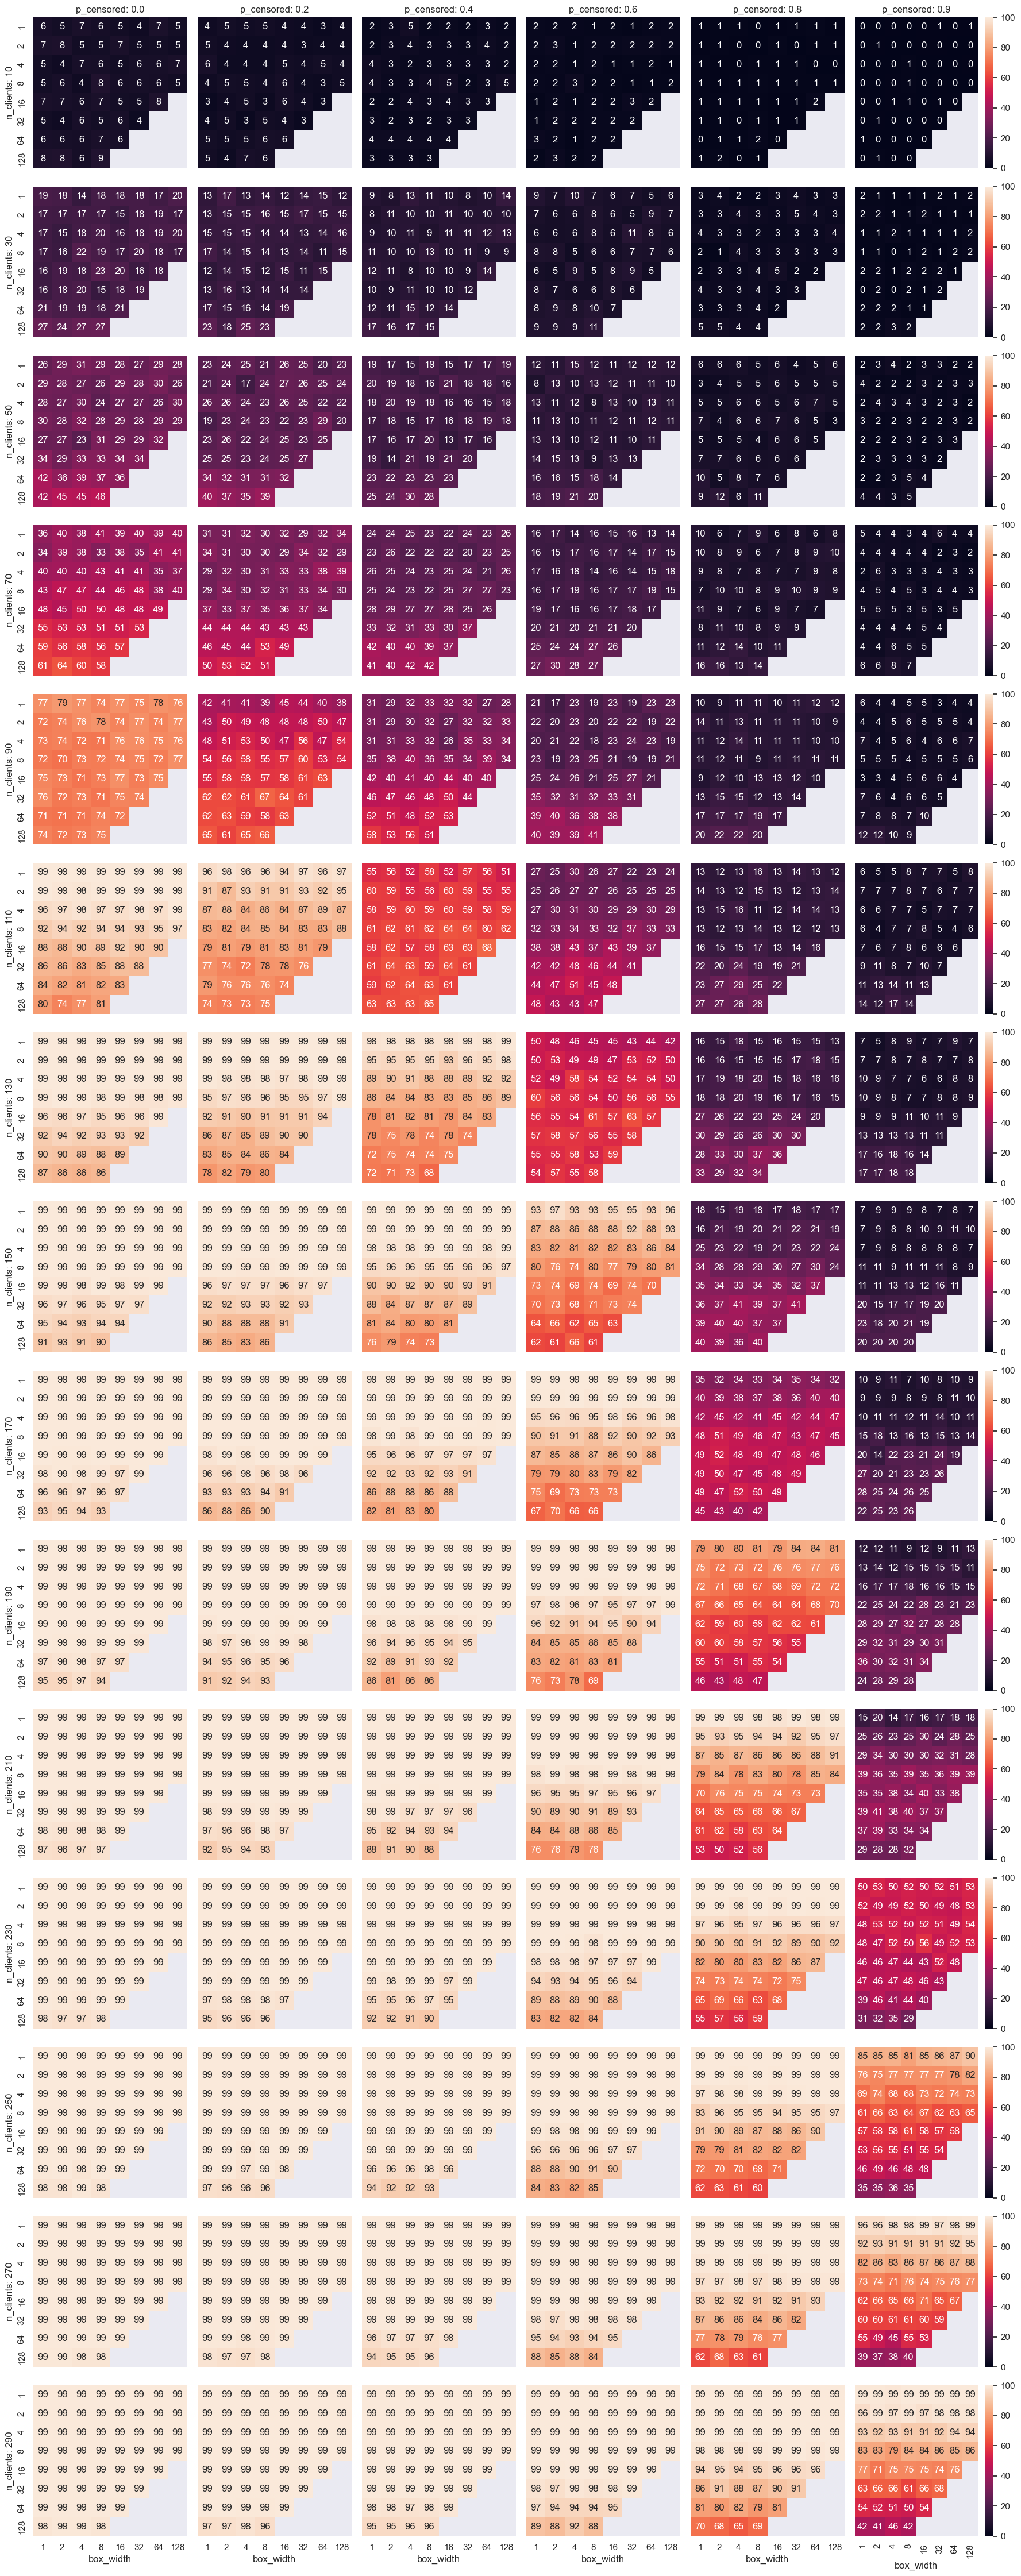

In [73]:
def plot_probs(df):
    n_clients_values = df["n_clients"].unique()
    p_censored_values = df["percent_censored"].unique()
    h, w = len(n_clients_values), len(p_censored_values)
    f, axs = plt.subplots(h, w, figsize=(w*3, h*3))
    axs = axs.flatten()
    for j, p_censored in enumerate(p_censored_values):
        for i, n_clients in enumerate(n_clients_values):
            a =  df[(df["percent_censored"] == p_censored) & (df["n_clients"] == n_clients)] \
                .pivot(index="box_height", columns="box_width", values="prob_95_conf")
            ax = axs[i * w + j]
            xlab = i == h-1
            ylab = j == 0
            sns.heatmap(a, ax=ax, vmin=0, vmax=100, cbar=j == w-1, xticklabels=xlab, yticklabels=ylab, annot=True, fmt=".0f")
            ax.set_ylabel(None)
            if not xlab:
                ax.set_xlabel(None) 
            if ylab:
                ax.set_ylabel("n_clients: {}".format(n_clients)) 
            if i == 0:
                ax.set_title("p_censored: {}".format(p_censored))

    plt.tight_layout()
    
plot_probs(df[df["dims"] == 1])

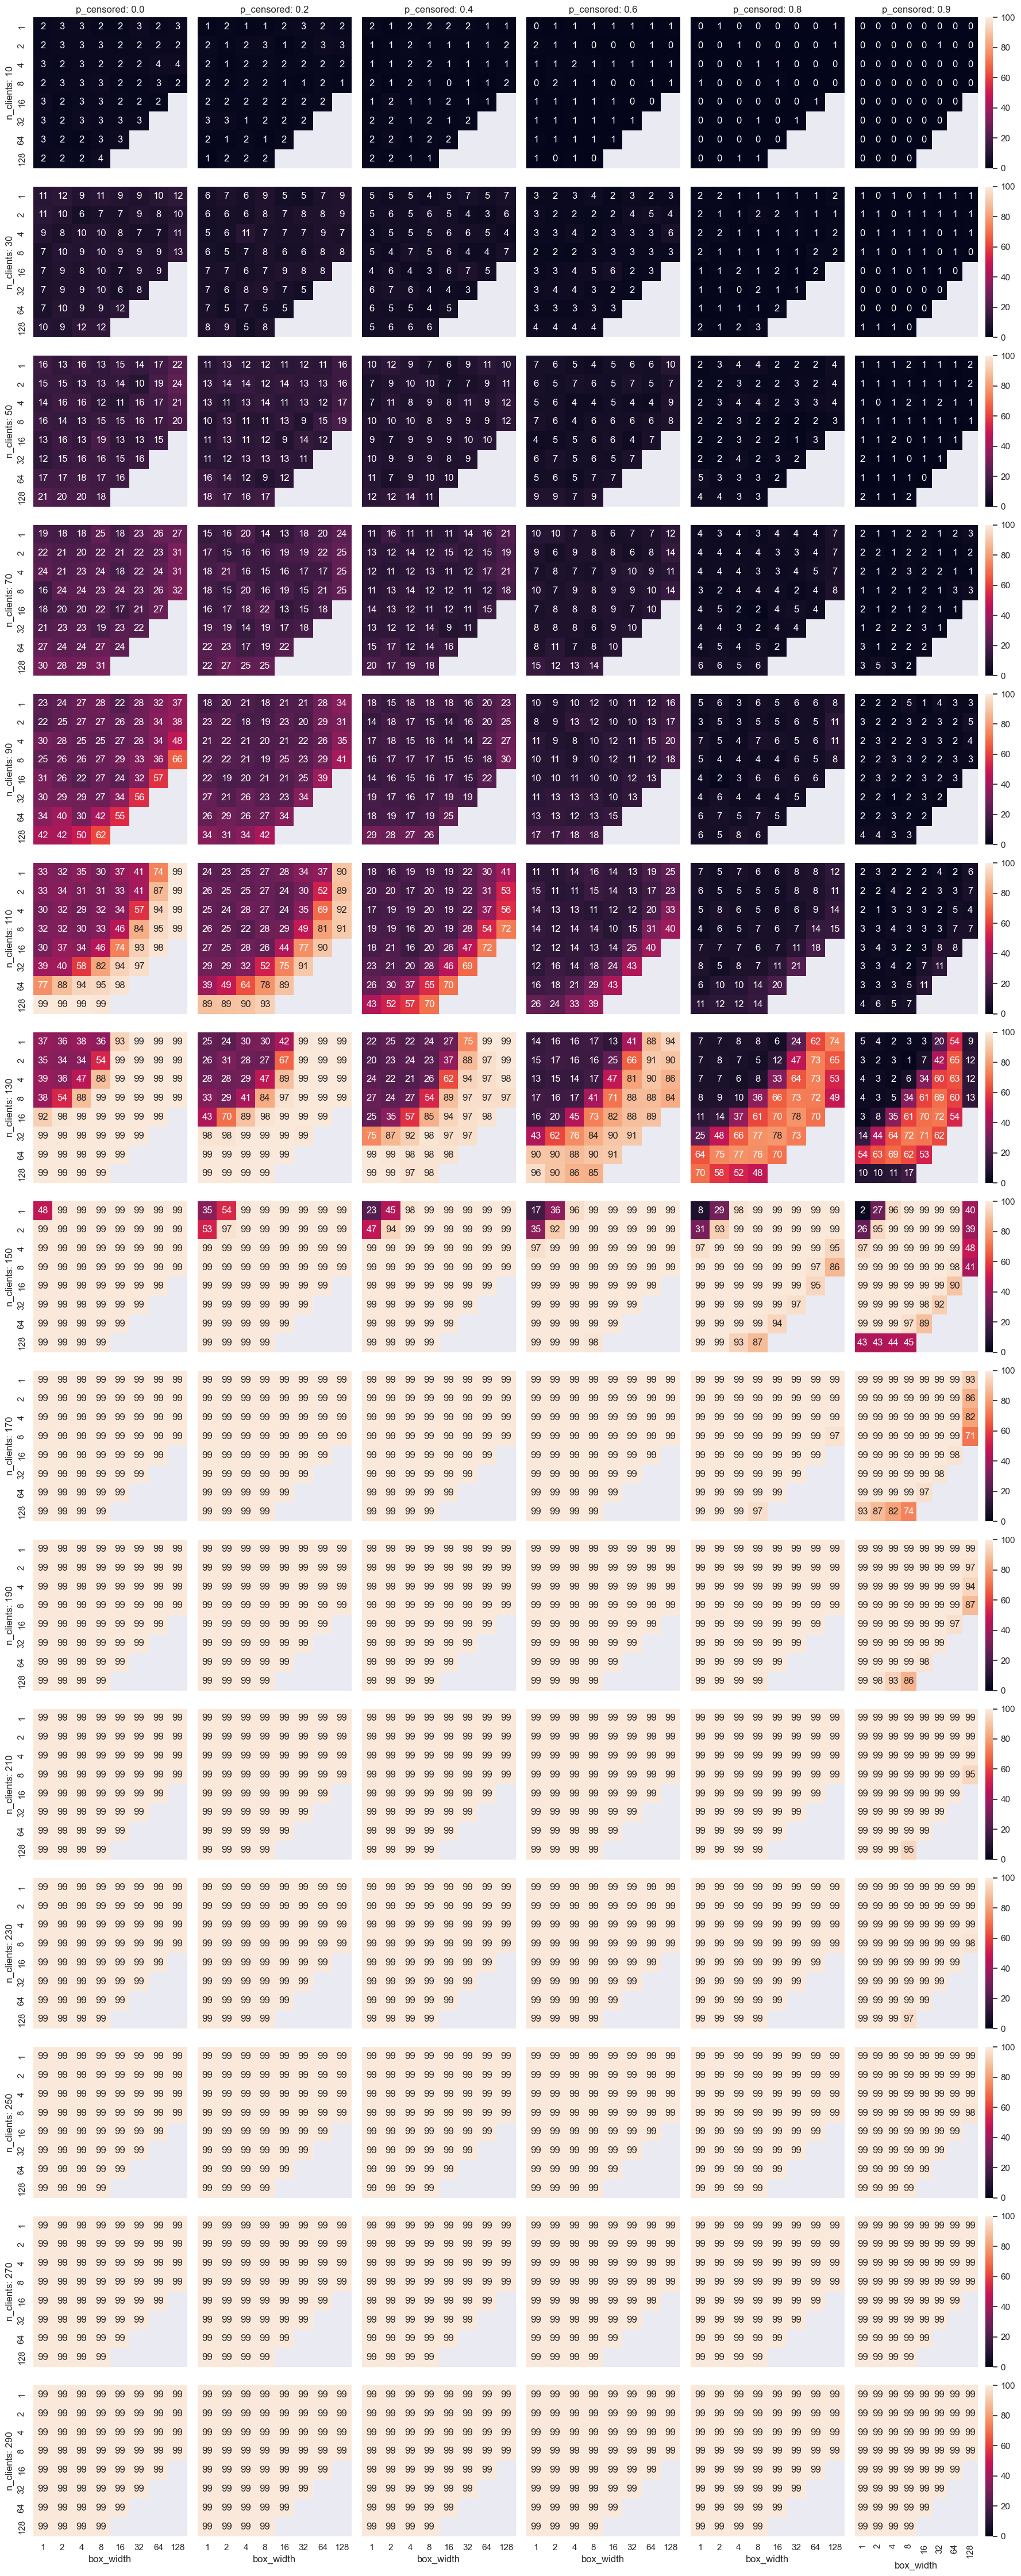

In [74]:
plot_probs(df[df["dims"] == 2])